# Two Sum (LeetCode #1)

## Problem

Given an array of integers `nums` and an integer `target`, return **indices of the two numbers** such that they add up to `target`.

You may assume that each input would have **exactly one solution**, and you may not use the same element twice.

You can return the answer in any order.

**Constraints:**
- `2 <= nums.length <= 10^4`
- `-10^9 <= nums[i] <= 10^9`
- `-10^9 <= target <= 10^9`
- Only one valid answer exists.

**Examples:**

| Input | Target | Output | Explanation |
|-------|--------|--------|-------------|
| `[2, 7, 11, 15]` | `9` | `[0, 1]` | `nums[0] + nums[1] = 2 + 7 = 9` |
| `[3, 2, 4]` | `6` | `[1, 2]` | `nums[1] + nums[2] = 2 + 4 = 6` |
| `[3, 3]` | `6` | `[0, 1]` | `nums[0] + nums[1] = 3 + 3 = 6` |

## Intuition

**The core insight:** For each number `x` in the array, you don't need to search the entire array for its partner — you already know *exactly* what you're looking for: `target - x`. The question is just whether you've seen that complement before.

**Analogy:** Imagine you're at a party trying to find two people whose ages add to 50. The brute-force way: introduce every pair and ask their ages. The smart way: as each person arrives, ask their age, compute 50 minus that, and check a guest list you've been keeping. You find the pair in one pass through the door.

### Common wrong approaches

1. **Sort first, then two pointers.** This works for finding the *values* (and is optimal for the variant "Two Sum II — sorted array"), but sorting destroys the original indices. You'd need to track the original positions, adding complexity for no gain over the hash map approach.

2. **Binary search for complement.** Sort + binary search gives O(n log n). It works but is slower than the O(n) hash map approach and has the same index-tracking problem.

3. **Using a set instead of a dict.** A set can tell you if the complement *exists*, but can't tell you *where* it is — you need the index, so you need a dict mapping value → index.

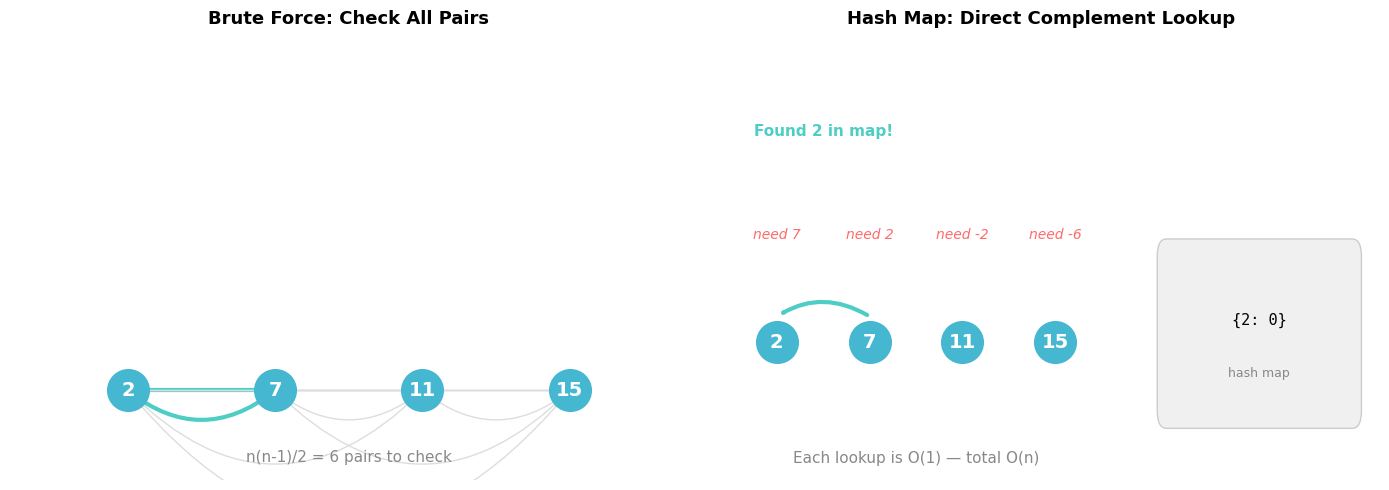

Left: brute force checks all pairs. Right: hash map finds complement instantly.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Visualize why brute force is wasteful vs. hash map lookup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

nums = [2, 7, 11, 15]
target = 9
n = len(nums)

# Left: Brute force — all pairs
ax1.set_title('Brute Force: Check All Pairs', fontsize=13, fontweight='bold')
for i in range(n):
    for j in range(i + 1, n):
        color = '#4ecdc4' if nums[i] + nums[j] == target else '#ddd'
        lw = 3 if nums[i] + nums[j] == target else 1
        ax1.plot([i, j], [0, 0], 'o-', color=color, linewidth=lw,
                 markersize=0, zorder=1)
        # Draw arcs above for each pair
        mid = (i + j) / 2
        height = (j - i) * 0.3
        arc = patches.FancyArrowPatch((i, 0), (j, 0),
            connectionstyle=f"arc3,rad={0.3 + (j-i)*0.1}",
            color=color, linewidth=lw, arrowstyle='-')
        ax1.add_patch(arc)

for i, val in enumerate(nums):
    ax1.plot(i, 0, 'o', markersize=30, color='#45b7d1', zorder=5)
    ax1.text(i, 0, str(val), ha='center', va='center',
             fontsize=14, fontweight='bold', color='white', zorder=6)
ax1.set_xlim(-0.8, n - 0.2)
ax1.set_ylim(-0.5, 2.0)
ax1.axis('off')
ax1.text(n/2 - 0.5, -0.4, f'n(n-1)/2 = {n*(n-1)//2} pairs to check',
         ha='center', fontsize=11, color='#888')

# Right: Hash map — direct lookup
ax2.set_title('Hash Map: Direct Complement Lookup', fontsize=13, fontweight='bold')
for i, val in enumerate(nums):
    ax2.plot(i, 0, 'o', markersize=30, color='#45b7d1', zorder=5)
    ax2.text(i, 0, str(val), ha='center', va='center',
             fontsize=14, fontweight='bold', color='white', zorder=6)
    # Show complement
    complement = target - val
    ax2.text(i, 0.6, f'need {complement}', ha='center', fontsize=10,
             color='#ff6b6b', fontstyle='italic')

# Show the match with arrow
match_arc = patches.FancyArrowPatch((1, 0.15), (0, 0.15),
    connectionstyle="arc3,rad=0.3",
    color='#4ecdc4', linewidth=3, arrowstyle='->')
ax2.add_patch(match_arc)
ax2.text(0.5, 1.2, 'Found 2 in map!', ha='center', fontsize=11,
         color='#4ecdc4', fontweight='bold')

# Hash map box
rect = patches.FancyBboxPatch((n + 0.2, -0.4), 2.0, 0.9,
    boxstyle="round,pad=0.1", facecolor='#f0f0f0', edgecolor='#ccc')
ax2.add_patch(rect)
ax2.text(n + 1.2, 0.1, '{2: 0}', ha='center', fontsize=11, fontfamily='monospace')
ax2.text(n + 1.2, -0.2, 'hash map', ha='center', fontsize=9, color='#888')

ax2.set_xlim(-0.8, n + 2.5)
ax2.set_ylim(-0.8, 1.8)
ax2.axis('off')
ax2.text(n/2 - 0.5, -0.7, 'Each lookup is O(1) — total O(n)',
         ha='center', fontsize=11, color='#888')

plt.tight_layout()
plt.show()
print("Left: brute force checks all pairs. Right: hash map finds complement instantly.")

## Approach 1: Brute Force

**Strategy:** Check every pair `(i, j)` where `i < j` and see if `nums[i] + nums[j] == target`.

**Why start here:** It's the most direct translation of the problem. No clever data structures — just iterate and check. Understanding why this is slow motivates the hash map approach.

In [2]:
from typing import List

class SolutionBruteForce:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        n = len(nums)
        for i in range(n):
            for j in range(i + 1, n):
                if nums[i] + nums[j] == target:
                    return [i, j]
        return []  # guaranteed not to reach here per constraints

# Test cases
sol_bf = SolutionBruteForce()

result1 = sol_bf.twoSum([2, 7, 11, 15], 9)
print(f"twoSum([2, 7, 11, 15], 9) = {result1}")
assert result1 == [0, 1]

result2 = sol_bf.twoSum([3, 2, 4], 6)
print(f"twoSum([3, 2, 4], 6) = {result2}")
assert result2 == [1, 2]

result3 = sol_bf.twoSum([3, 3], 6)
print(f"twoSum([3, 3], 6) = {result3}")
assert result3 == [0, 1]

print("\nAll brute force tests passed!")

twoSum([2, 7, 11, 15], 9) = [0, 1]
twoSum([3, 2, 4], 6) = [1, 2]
twoSum([3, 3], 6) = [0, 1]

All brute force tests passed!


### Walkthrough: Brute Force

In [3]:
# Trace brute force on [2, 7, 11, 15], target=9
nums = [2, 7, 11, 15]
target = 9
print(f"Input: nums={nums}, target={target}")
print(f"{'Step':<6} {'i':<4} {'j':<4} {'nums[i]':<9} {'nums[j]':<9} {'Sum':<6} {'Match?'}")
print("-" * 50)

step = 0
for i in range(len(nums)):
    for j in range(i + 1, len(nums)):
        step += 1
        s = nums[i] + nums[j]
        match = "YES" if s == target else "no"
        print(f"{step:<6} {i:<4} {j:<4} {nums[i]:<9} {nums[j]:<9} {s:<6} {match}")
        if s == target:
            print(f"\nFound! Return [{i}, {j}]")
            break
    else:
        continue
    break

print(f"\nTotal comparisons: {step} (worst case for n={len(nums)}: {len(nums)*(len(nums)-1)//2})")

Input: nums=[2, 7, 11, 15], target=9
Step   i    j    nums[i]   nums[j]   Sum    Match?
--------------------------------------------------
1      0    1    2         7         9      YES

Found! Return [0, 1]

Total comparisons: 1 (worst case for n=4: 6)


**Limitation:** The brute force approach makes O(n²) comparisons. For the given constraint of n ≤ 10⁴, that's up to 50 million operations — it will pass on LeetCode but barely. For larger inputs, we need something faster.

---

## Approach 2: Hash Map (Optimal)

**Strategy:** Walk through the array once. For each number `x`, compute `complement = target - x`. Check if the complement is already in a hash map. If yes, return both indices. If no, store `x → index` in the map and move on.

**Why a hash map?** We need two things: (1) O(1) lookup to check if a complement exists, and (2) storage of the index where we saw it. A dict gives both.

In [4]:
from typing import List

class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        seen = {}  # value -> index
        for i, x in enumerate(nums):
            complement = target - x
            if complement in seen:
                return [seen[complement], i]
            seen[x] = i
        return []

# Test cases
sol = Solution()

result1 = sol.twoSum([2, 7, 11, 15], 9)
print(f"twoSum([2, 7, 11, 15], 9) = {result1}")
assert result1 == [0, 1]

result2 = sol.twoSum([3, 2, 4], 6)
print(f"twoSum([3, 2, 4], 6) = {result2}")
assert result2 == [1, 2]

result3 = sol.twoSum([3, 3], 6)
print(f"twoSum([3, 3], 6) = {result3}")
assert result3 == [0, 1]

print("\nAll hash map tests passed!")

twoSum([2, 7, 11, 15], 9) = [0, 1]
twoSum([3, 2, 4], 6) = [1, 2]
twoSum([3, 3], 6) = [0, 1]

All hash map tests passed!


### Walkthrough: Hash Map

In [5]:
# Trace hash map approach on [2, 7, 11, 15], target=9
nums = [2, 7, 11, 15]
target = 9
print(f"Input: nums={nums}, target={target}")
print(f"{'Step':<6} {'i':<4} {'x':<6} {'complement':<12} {'In map?':<10} {'Action':<25} {'Map state'}")
print("-" * 90)

seen = {}
for i, x in enumerate(nums):
    complement = target - x
    if complement in seen:
        action = f"FOUND! Return [{seen[complement]}, {i}]"
        print(f"{i+1:<6} {i:<4} {x:<6} {complement:<12} {'YES':<10} {action:<25} {seen}")
        break
    else:
        action = f"Store {x} -> {i}"
        print(f"{i+1:<6} {i:<4} {x:<6} {complement:<12} {'no':<10} {action:<25} {seen}")
        seen[x] = i

print(f"\nFinal map: {seen}")
print(f"Total lookups: {i + 1} (vs brute force: {len(nums)*(len(nums)-1)//2} comparisons)")

Input: nums=[2, 7, 11, 15], target=9
Step   i    x      complement   In map?    Action                    Map state
------------------------------------------------------------------------------------------
1      0    2      7            no         Store 2 -> 0              {}
2      1    7      2            YES        FOUND! Return [0, 1]      {2: 0}

Final map: {2: 0}
Total lookups: 2 (vs brute force: 6 comparisons)


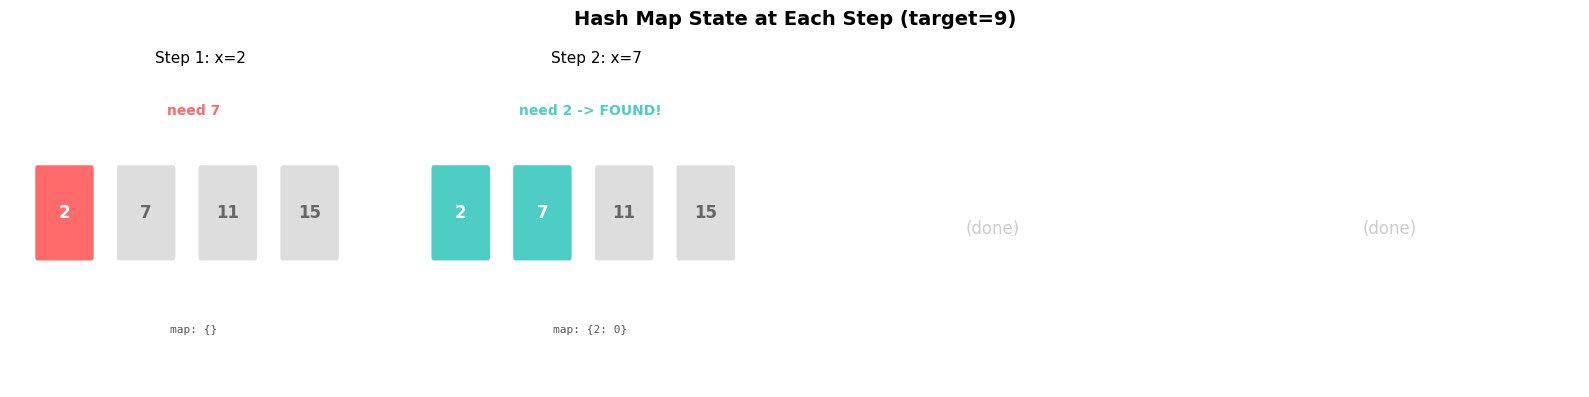

Red = current element being checked. Blue = already stored in map. Green = match found.


In [6]:
# Visualize the hash map state at each step
import matplotlib.pyplot as plt
import matplotlib.patches as patches

nums = [2, 7, 11, 15]
target = 9

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Hash Map State at Each Step (target=9)', fontsize=14, fontweight='bold')

seen = {}
for step, (i, x) in enumerate(enumerate(nums)):
    ax = axes[step]
    complement = target - x
    found = complement in seen

    # Draw array
    for idx, val in enumerate(nums):
        if idx == i:
            color = '#4ecdc4' if found else '#ff6b6b'  # current element
        elif found and idx == seen.get(complement):
            color = '#4ecdc4'  # matched complement
        elif idx < i:
            color = '#45b7d1'  # already in map
        else:
            color = '#ddd'
        rect = patches.FancyBboxPatch((idx * 1.2 - 0.4, 1.5), 0.8, 0.8,
            boxstyle="round,pad=0.05", facecolor=color, edgecolor='white', linewidth=2)
        ax.add_patch(rect)
        ax.text(idx * 1.2, 1.9, str(val), ha='center', va='center',
                fontsize=12, fontweight='bold',
                color='white' if color != '#ddd' else '#666')

    # Show complement lookup
    status = f"need {complement}" + (" -> FOUND!" if found else "")
    ax.text(len(nums) * 1.2 / 2 - 0.5, 2.8, status, ha='center',
            fontsize=10, color='#4ecdc4' if found else '#ff6b6b', fontweight='bold')

    # Show map contents
    map_text = str(dict(seen)) if seen else '{}'
    ax.text(len(nums) * 1.2 / 2 - 0.5, 0.8, f'map: {map_text}', ha='center',
            fontsize=8, fontfamily='monospace', color='#555')

    ax.set_title(f'Step {step + 1}: x={x}', fontsize=11)
    ax.set_xlim(-0.8, len(nums) * 1.2)
    ax.set_ylim(0.3, 3.2)
    ax.axis('off')

    if not found:
        seen[x] = i
    else:
        break

# Fill remaining axes if we broke early
for j in range(step + 1, len(axes)):
    axes[j].axis('off')
    axes[j].text(0.5, 0.5, '(done)', ha='center', va='center',
                 transform=axes[j].transAxes, fontsize=12, color='#ccc')

plt.tight_layout()
plt.show()
print("Red = current element being checked. Blue = already stored in map. Green = match found.")

### Animated Walkthrough

Rendered 4 frames.



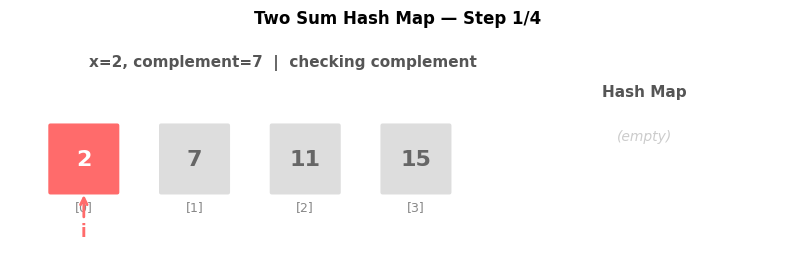

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import base64
import json as _json
import random
from IPython.display import display, HTML

# --- Problem-specific setup ---
nums = [2, 7, 11, 15]
target = 9

# --- Build snapshots ---
snapshots = []
seen = {}
for i, x in enumerate(nums):
    complement = target - x
    found = complement in seen
    snapshots.append({
        "nums": nums[:],
        "i": i,
        "x": x,
        "complement": complement,
        "found": found,
        "match_idx": seen.get(complement),
        "seen": dict(seen),
        "status": "checking complement"
    })
    if found:
        # Add a "found" frame
        snapshots.append({
            "nums": nums[:],
            "i": i,
            "x": x,
            "complement": complement,
            "found": True,
            "match_idx": seen[complement],
            "seen": dict(seen),
            "status": f"FOUND! Return [{seen[complement]}, {i}]"
        })
        break
    else:
        seen[x] = i
        snapshots.append({
            "nums": nums[:],
            "i": i,
            "x": x,
            "complement": complement,
            "found": False,
            "match_idx": None,
            "seen": dict(seen),
            "status": f"Not found. Store {x} -> {i}"
        })

def render_frame(ax, snap, step_idx, total_steps):
    a = snap["nums"]
    n = len(a)
    
    # Draw array cells
    for idx, val in enumerate(a):
        if snap["found"] and idx == snap["match_idx"]:
            color = '#4ecdc4'  # matched complement
        elif idx == snap["i"]:
            color = '#ff6b6b'  # current element
        elif val in snap["seen"] and snap["seen"][val] == idx:
            color = '#45b7d1'  # in hash map
        else:
            color = '#ddd'
        
        rect = patches.FancyBboxPatch((idx * 1.5 - 0.45, 0.8), 0.9, 0.9,
            boxstyle="round,pad=0.05", facecolor=color, edgecolor='white', linewidth=2)
        ax.add_patch(rect)
        ax.text(idx * 1.5, 1.25, str(val), ha='center', va='center',
                fontsize=16, fontweight='bold',
                color='white' if color != '#ddd' else '#666')
        ax.text(idx * 1.5, 0.55, f'[{idx}]', ha='center', fontsize=9, color='#888')
    
    # Current pointer
    ax.annotate('i', xy=(snap["i"] * 1.5, 0.8), xytext=(snap["i"] * 1.5, 0.2),
                fontsize=12, fontweight='bold', color='#ff6b6b', ha='center',
                arrowprops=dict(arrowstyle='->', color='#ff6b6b', lw=2))
    
    # Hash map visualization
    map_x = n * 1.5 + 0.8
    ax.text(map_x + 0.8, 2.1, 'Hash Map', ha='center', fontsize=11,
            fontweight='bold', color='#555')
    if snap["seen"]:
        for row, (k, v) in enumerate(snap["seen"].items()):
            y_pos = 1.6 - row * 0.35
            rect = patches.FancyBboxPatch((map_x - 0.1, y_pos - 0.12), 1.8, 0.3,
                boxstyle="round,pad=0.03", facecolor='#f0f0f0', edgecolor='#ccc')
            ax.add_patch(rect)
            ax.text(map_x + 0.8, y_pos + 0.03, f'{k} -> idx {v}',
                    ha='center', fontsize=10, fontfamily='monospace', color='#555')
    else:
        ax.text(map_x + 0.8, 1.5, '(empty)', ha='center', fontsize=10,
                color='#ccc', fontstyle='italic')
    
    # Status text
    status_color = '#4ecdc4' if snap["found"] else '#555'
    ax.text(n * 1.5 / 2 - 0.3, 2.5,
            f'x={snap["x"]}, complement={snap["complement"]}  |  {snap["status"]}',
            ha='center', fontsize=11, color=status_color, fontweight='bold')
    
    ax.set_xlim(-1, n * 1.5 + 3.5)
    ax.set_ylim(-0.2, 2.9)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Two Sum Hash Map — Step {step_idx + 1}/{total_steps}',
                 fontsize=12, fontweight='bold', pad=10)

# --- Render frames ---
frames_b64 = []
for i, snap in enumerate(snapshots):
    fig, ax = plt.subplots(figsize=(10, 4))
    render_frame(ax, snap, i, len(snapshots))
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    plt.close(fig)
    buf.seek(0)
    frames_b64.append(base64.b64encode(buf.read()).decode('ascii'))

assert len(frames_b64) >= 3, f"Too few frames ({len(frames_b64)}); need at least 3"
assert len(frames_b64) <= 50, f"Too many frames ({len(frames_b64)}); max is 50"
print(f"Rendered {len(frames_b64)} frames.")

# --- Player ---
uid = f"ap{random.randint(10000, 99999)}"
n_frames = len(frames_b64)

html_tpl = """
<div id="__UID__" style="text-align:center; font-family:-apple-system,BlinkMacSystemFont,'Segoe UI',sans-serif; max-width:820px; margin:0 auto;">
  <style>
    #__UID__ .ap-frame {
      background:#fafafa; border:1px solid #e0e0e0;
      border-radius:10px; padding:12px; margin-bottom:8px;
    }
    #__UID__ .ap-frame img { max-width:100%; border-radius:6px; display:block; margin:0 auto; }
    #__UID__ .ap-controls { display:flex; justify-content:center; gap:8px; flex-wrap:wrap; }
    #__UID__ .ap-btn {
      padding:8px 16px; border:1px solid #ddd; border-radius:8px;
      background:white; font-size:14px; cursor:pointer; color:#333;
      transition:all 0.15s ease; user-select:none;
    }
    #__UID__ .ap-btn:hover:not(:disabled) { background:#f0f0f0; transform:scale(1.03); }
    #__UID__ .ap-btn:disabled { opacity:0.35; cursor:default; transform:none; }
    #__UID__ .ap-btn:active:not(:disabled) { transform:scale(0.97); }
    #__UID__ .ap-play {
      padding:8px 22px; border:none; border-radius:8px;
      background:#45b7d1; color:white; font-size:14px; font-weight:600;
      cursor:pointer; min-width:120px; transition:all 0.15s ease; user-select:none;
    }
    #__UID__ .ap-play:hover { filter:brightness(0.9); transform:scale(1.03); }
    #__UID__ .ap-play:active { transform:scale(0.97); }
    #__UID__ .ap-slider-row input[type=range] {
      width:80%; accent-color:#45b7d1; cursor:pointer; height:6px;
    }
    #__UID__ .ap-speed-row {
      display:flex; justify-content:center; align-items:center;
      gap:6px; margin-top:10px; flex-wrap:wrap;
    }
    #__UID__ .ap-speed-label {
      font-size:13px; color:#888; font-weight:500; margin-right:2px;
    }
    #__UID__ .ap-speed {
      padding:4px 12px; border:1px solid #ddd; border-radius:6px;
      background:white; font-size:13px; cursor:pointer; color:#555;
      transition:all 0.15s ease; user-select:none;
    }
    #__UID__ .ap-speed:hover { background:#f0f0f0; }
    #__UID__ .ap-speed.active {
      background:#45b7d1; color:white; border-color:#45b7d1; font-weight:600;
    }
  </style>
  <div class="ap-frame">
    <img id="__UID__-img" src="data:image/png;base64,__FIRST_FRAME__">
  </div>
  <div class="ap-slider-row" style="margin:10px 0 4px;">
    <input type="range" id="__UID__-slider" min="0" max="__MAX__" value="0">
  </div>
  <div id="__UID__-label" style="margin:2px 0 14px; font-size:15px; color:#555; font-weight:500;">
    Step 0 / __MAX__
  </div>
  <div class="ap-controls">
    <button class="ap-btn" id="__UID__-back" title="Go back one step">&#9664; Back</button>
    <button class="ap-play" id="__UID__-play" title="Play / Pause">&#9654;  Play</button>
    <button class="ap-btn" id="__UID__-fwd" title="Go forward one step">Next &#9654;</button>
    <button class="ap-btn" id="__UID__-replay" title="Start over from the beginning">&#8635; Replay</button>
  </div>
  <div class="ap-speed-row">
    <span class="ap-speed-label">Speed:</span>
    <button class="ap-speed" data-ms="2000">0.5x</button>
    <button class="ap-speed active" data-ms="1000">1x</button>
    <button class="ap-speed" data-ms="500">2x</button>
    <button class="ap-speed" data-ms="333">3x</button>
    <button class="ap-speed" data-ms="200">5x</button>
  </div>
</div>
"""

js_tpl = """
<script>
(function() {
  var frames = __FRAMES__;
  var cur = 0, playing = false, tmr = null, N = frames.length, MS = 1000;
  var el = function(s) { return document.getElementById('__UID__-' + s); };
  var img = el('img'), sld = el('slider'), lbl = el('label');
  var btnPlay = el('play'), btnBack = el('back'), btnFwd = el('fwd');
  var container = document.getElementById('__UID__');

  function show(i) {
    cur = Math.max(0, Math.min(N - 1, i));
    img.src = 'data:image/png;base64,' + frames[cur];
    sld.value = cur;
    lbl.textContent = 'Step ' + cur + ' / ' + (N - 1);
    btnBack.disabled = (cur === 0);
    btnFwd.disabled = (cur === N - 1);
  }

  function tick() {
    if (!playing || cur >= N - 1) { stopPlay(); return; }
    show(cur + 1);
    tmr = setTimeout(tick, MS);
  }

  function startPlay() {
    if (cur >= N - 1) show(0);
    playing = true;
    btnPlay.innerHTML = '&#9646;&#9646;  Pause';
    btnPlay.style.background = '#e74c3c';
    tmr = setTimeout(tick, MS);
  }

  function stopPlay() {
    playing = false;
    btnPlay.innerHTML = '&#9654;  Play';
    btnPlay.style.background = '#45b7d1';
    if (tmr) { clearTimeout(tmr); tmr = null; }
  }

  btnPlay.onclick = function() { playing ? stopPlay() : startPlay(); };
  btnBack.onclick = function() { stopPlay(); show(cur - 1); };
  btnFwd.onclick = function() { stopPlay(); show(cur + 1); };
  el('replay').onclick = function() { show(0); startPlay(); };
  sld.oninput = function() { stopPlay(); show(parseInt(this.value)); };

  var speedBtns = container.querySelectorAll('.ap-speed');
  for (var i = 0; i < speedBtns.length; i++) {
    speedBtns[i].onclick = (function(btn) {
      return function() {
        MS = parseInt(btn.getAttribute('data-ms'));
        for (var j = 0; j < speedBtns.length; j++)
          speedBtns[j].classList.remove('active');
        btn.classList.add('active');
        if (playing) {
          if (tmr) { clearTimeout(tmr); tmr = null; }
          tmr = setTimeout(tick, MS);
        }
      };
    })(speedBtns[i]);
  }

  show(0);
})();
</script>
"""

player_html = (html_tpl
    .replace('__UID__', uid)
    .replace('__FIRST_FRAME__', frames_b64[0])
    .replace('__MAX__', str(n_frames - 1)))

player_js = (js_tpl
    .replace('__FRAMES__', _json.dumps(frames_b64))
    .replace('__UID__', uid))

display(HTML(player_html + player_js))

## Benchmark

n          Brute Force (ms)     Hash Map (ms)        Speedup
------------------------------------------------------------
100        0.117                0.006                18.8x
500        3.462                0.041                84.8x
1000       15.359               0.063                244.4x


2000       57.805               0.129                449.2x


5000       363.234              0.286                1271.8x


10000      1440.222             0.614                2344.5x


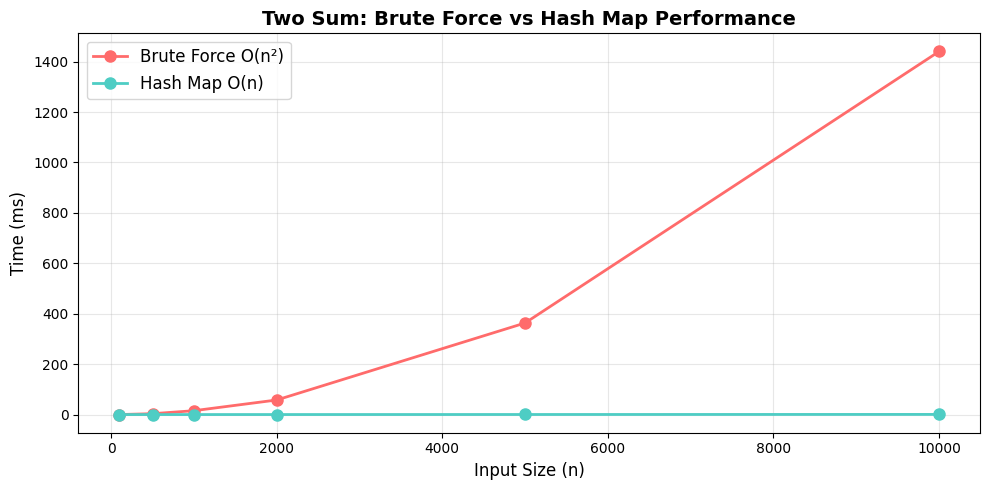


The quadratic growth of brute force is clearly visible. Hash map stays nearly flat.


In [8]:
import time
import random
import matplotlib.pyplot as plt
from typing import List

class SolutionBruteForce:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        n = len(nums)
        for i in range(n):
            for j in range(i + 1, n):
                if nums[i] + nums[j] == target:
                    return [i, j]
        return []

class SolutionHashMap:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        seen = {}
        for i, x in enumerate(nums):
            complement = target - x
            if complement in seen:
                return [seen[complement], i]
            seen[x] = i
        return []

def generate_test_case(n):
    """Generate a worst-case input where the answer is at the very end."""
    nums = list(range(1, n + 1))  # [1, 2, ..., n]
    # Target is sum of last two elements -> forces full scan for brute force
    target = nums[-1] + nums[-2]
    return nums, target

sizes = [100, 500, 1000, 2000, 5000, 10000]
bf_times = []
hm_times = []

sol_bf = SolutionBruteForce()
sol_hm = SolutionHashMap()

print(f"{'n':<10} {'Brute Force (ms)':<20} {'Hash Map (ms)':<20} {'Speedup'}")
print("-" * 60)

for n in sizes:
    nums, target = generate_test_case(n)
    
    # Brute force timing (average of 3 runs)
    bf_total = 0
    for _ in range(3):
        start = time.perf_counter()
        sol_bf.twoSum(nums, target)
        bf_total += time.perf_counter() - start
    bf_ms = (bf_total / 3) * 1000
    bf_times.append(bf_ms)
    
    # Hash map timing (average of 3 runs)
    hm_total = 0
    for _ in range(3):
        start = time.perf_counter()
        sol_hm.twoSum(nums, target)
        hm_total += time.perf_counter() - start
    hm_ms = (hm_total / 3) * 1000
    hm_times.append(hm_ms)
    
    speedup = bf_ms / hm_ms if hm_ms > 0 else float('inf')
    print(f"{n:<10} {bf_ms:<20.3f} {hm_ms:<20.3f} {speedup:.1f}x")

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sizes, bf_times, 'o-', color='#ff6b6b', linewidth=2, markersize=8, label='Brute Force O(n\u00b2)')
ax.plot(sizes, hm_times, 'o-', color='#4ecdc4', linewidth=2, markersize=8, label='Hash Map O(n)')
ax.set_xlabel('Input Size (n)', fontsize=12)
ax.set_ylabel('Time (ms)', fontsize=12)
ax.set_title('Two Sum: Brute Force vs Hash Map Performance', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("\nThe quadratic growth of brute force is clearly visible. Hash map stays nearly flat.")

## Complexity Analysis

| Approach | Time | Space | Why |
|----------|------|-------|-----|
| Brute Force | O(n\u00b2) | O(1) | Two nested loops over n elements. No extra storage. |
| Hash Map | O(n) | O(n) | Single pass. Each lookup and insertion in the dict is O(1) average. The dict stores up to n entries. |

**Trade-off:** The hash map trades O(n) space for an O(n) speedup. This is almost always worth it — memory is cheap, time is not. The only scenario where brute force might be preferred is extremely memory-constrained environments with small n.

## Edge Cases & Follow-ups

In [9]:
sol = Solution()

# Edge case 1: Duplicate values that form the answer
result = sol.twoSum([3, 3], 6)
print(f"Duplicates: twoSum([3, 3], 6) = {result}")
assert result == [0, 1], "Should handle duplicate values"

# Edge case 2: Negative numbers
result = sol.twoSum([-1, -2, -3, -4, -5], -8)
print(f"Negatives: twoSum([-1, -2, -3, -4, -5], -8) = {result}")
assert result == [2, 4], "Should handle negative numbers"

# Edge case 3: Zero in the array
result = sol.twoSum([0, 4, 3, 0], 0)
print(f"Zeros: twoSum([0, 4, 3, 0], 0) = {result}")
assert result == [0, 3], "Should handle zeros"

# Edge case 4: Large numbers
result = sol.twoSum([1000000000, -1000000000, 3, 4], 0)
print(f"Large: twoSum([10^9, -10^9, 3, 4], 0) = {result}")
assert result == [0, 1], "Should handle large numbers"

# Edge case 5: Minimum array size
result = sol.twoSum([1, 2], 3)
print(f"Min size: twoSum([1, 2], 3) = {result}")
assert result == [0, 1], "Should handle minimum array size"

# Edge case 6: Answer at the end
result = sol.twoSum([1, 2, 3, 4, 5], 9)
print(f"End pair: twoSum([1, 2, 3, 4, 5], 9) = {result}")
assert result == [3, 4], "Should find answer at the end"

print("\nAll edge case tests passed!")

Duplicates: twoSum([3, 3], 6) = [0, 1]
Negatives: twoSum([-1, -2, -3, -4, -5], -8) = [2, 4]
Zeros: twoSum([0, 4, 3, 0], 0) = [0, 3]
Large: twoSum([10^9, -10^9, 3, 4], 0) = [0, 1]
Min size: twoSum([1, 2], 3) = [0, 1]
End pair: twoSum([1, 2, 3, 4, 5], 9) = [3, 4]

All edge case tests passed!


**Common mistakes:**
- Returning values instead of indices
- Using the same element twice (e.g., `nums = [3, 2, 4], target = 6` — returning `[0, 0]` instead of `[1, 2]`)
- Forgetting that the hash map approach handles duplicates naturally because we check *before* inserting

**Follow-up — what if the array is sorted?**
Use two pointers (left and right) instead. O(n) time, O(1) space — better than the hash map approach because no extra memory. This is LeetCode #167 (Two Sum II).

## Pattern & Generalization

**Pattern: Complement lookup with a hash map.**

The core technique: instead of searching for a pair that satisfies a condition, rephrase it as "for each element, does its complement exist?" and use a hash map for O(1) lookups.

**When to recognize this pattern:**
- You need to find a *pair* (or group) of elements satisfying a relationship
- The relationship can be expressed as `f(a) = b` where knowing `a` tells you exactly what `b` should be
- Brute force would check all pairs → O(n\u00b2)

**When this pattern does NOT work:**
1. **Three Sum / Four Sum** — complement lookup alone gives O(n\u00b2) for 3Sum. You need to combine it with sorting + two pointers for optimal results.
2. **Subarray sum equals K** — this looks like complement lookup, but the "complement" is a prefix sum, not an array element. The hash map stores prefix sums, not values. Similar technique, different data.

**Where this shows up outside interviews:**
- **Database joins:** Hash joins build a hash table of one table and probe with the other — same complement-lookup idea at scale
- **Spell checkers:** For each word, compute possible corrections and check them against a dictionary (hash set)
- **Network protocols:** Connection tracking tables map packet 5-tuples to session state — O(1) lookup per packet

## Related Problems

| # | Problem | Connection |
|---|---------|------------|
| 167 | **Two Sum II — Input Array Is Sorted** | Same problem on a sorted array. Use two pointers instead of a hash map: O(1) space. |
| 15 | **3Sum** | Find all triplets summing to zero. Reduce to Two Sum by fixing one element and using sorted two pointers on the rest. |
| 18 | **4Sum** | Same idea extended to four elements. Fix two, Two Sum on the rest. |
| 560 | **Subarray Sum Equals K** | Uses the same hash map complement pattern, but on *prefix sums* instead of raw values. |
| 1 | **Two Sum** (this problem) \u2192 **170. Two Sum III — Data Structure Design** | Design a class that supports `add(number)` and `find(target)`. Requires deciding between O(1) add / O(n) find vs O(n) add / O(1) find. |

## Practice Exercises

Try these variations to deepen your understanding of the complement-lookup pattern.

### Exercise 1: Two Sum — Return all pairs
Modify the solution to return **all** pairs of indices that sum to the target (not just one). The input may have multiple valid pairs.

### Exercise 2: Two Sum — Count pairs
Given an array that may contain duplicates, count the **number of distinct pairs** (by value, not index) that sum to the target.

### Exercise 3: Two Sum — Closest
Given an array and a target, find the pair whose sum is **closest** to the target. Return the pair of values.

In [10]:
from typing import List, Tuple

# Exercise 1: Starter code
def two_sum_all_pairs(nums: List[int], target: int) -> List[List[int]]:
    """Return all pairs of indices that sum to target."""
    # Hint: Use a hash map, but don't stop at the first match.
    # You'll need to handle duplicate values carefully.
    pass  # Your code here

# Exercise 2: Starter code
def two_sum_count_pairs(nums: List[int], target: int) -> int:
    """Count distinct value pairs that sum to target."""
    # Hint: Use a set to track which values you've seen,
    # and another set to track which pairs you've counted.
    pass  # Your code here

# Exercise 3: Starter code
def two_sum_closest(nums: List[int], target: int) -> Tuple[int, int]:
    """Return the pair of values whose sum is closest to target."""
    # Hint: Sort the array first, then use two pointers.
    # (This is one of the rare cases where sorting + two pointers
    # is better than a hash map, because you need to compare magnitudes.)
    pass  # Your code here

# Test cases (uncomment after implementing)
# assert two_sum_all_pairs([1, 2, 3, 4, 3], 6) == [[1, 3], [2, 4]]
# assert two_sum_count_pairs([1, 2, 3, 4, 3], 6) == 2  # (2,4) and (3,3)
# assert two_sum_closest([1, 3, 5, 8], 10) == (3, 8)  # sum=11, closest to 10

print("Starter code loaded. Implement the functions and uncomment the assertions!")

Starter code loaded. Implement the functions and uncomment the assertions!
